## Multinomial Logistic Regression on Heart Disease Dataset

// age -- age in years

// sex -- (1 = male; 0 = female)

// cp -- chest pain type

// trestbps -- resting blood pressure (in mm Hg on admission to the hospital)

// chol -- serum cholestoral in mg/dl

// fbs -- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

// restecg -- resting electrocardiographic results

// thalach -- maximum heart rate achieved

// exang -- exercise induced angina (1 = yes; 0 = no)

// old peak -- ST depression induced by exercise relative to rest

// slope -- the slope of the peak exercise ST segment

// ca -- number of major vessels (0-3) colored by flourosopy

// thal -- 3 = normal; 6 = fixed defect; 7 = reversable defect

// target -- 1 or 0

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE

In [95]:
heartdis = pd.read_csv("heart.csv")

In [96]:
heartdis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heartdis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heartdis["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

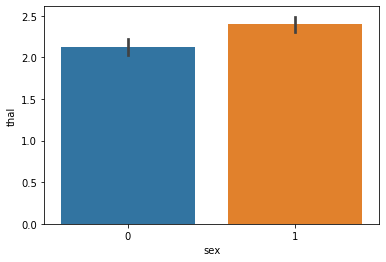

In [7]:
sns.barplot(x="sex", y="thal", data=heartdis)

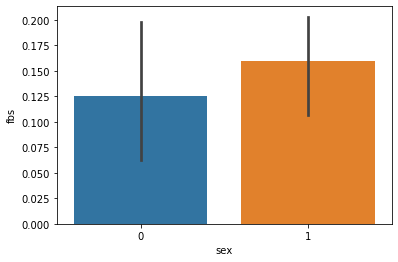

In [26]:
sns.barplot(x="sex", y="fbs", data=heartdis)

In [13]:
heartdis.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

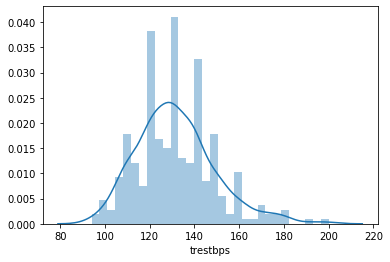

In [14]:
sns.distplot(heartdis["trestbps"], bins=30) # Slightly right skewed data, meaning outliers on the high side of the data

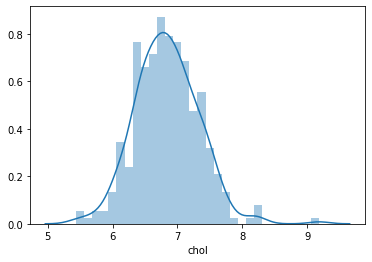

In [110]:
sns.distplot((heartdis["chol"]**.35), bins=30)

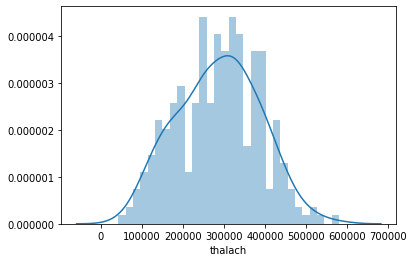

In [166]:
sns.distplot((heartdis["thalach"]**2.5), bins=30)

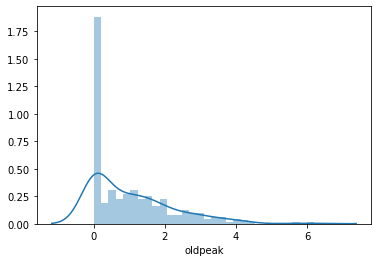

In [165]:
sns.distplot((heartdis["oldpeak"]), bins=30)

AxesSubplot(0.125,0.125;0.775x0.755)


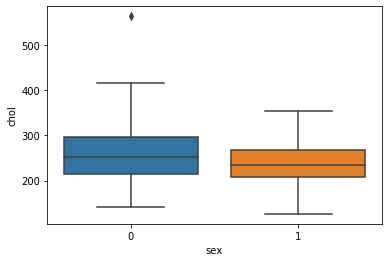

In [22]:
print(sns.boxplot(x="sex", y="chol", data=heartdis))

AxesSubplot(0.125,0.125;0.775x0.755)


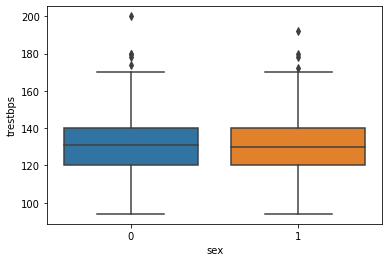

In [23]:
print(sns.boxplot(x="sex", y="trestbps", data=heartdis))

In [34]:
heartdis.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
X = heartdis[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = heartdis["target"]

In [37]:
model1 = sm.MNLogit(y,X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7


In [38]:
print(result1.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 target   No. Observations:                  303
Model:                        MNLogit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                  0.4893
Time:                        18:19:21   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
  target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0128      0.019      0.670      0.503      -0.025       0.050
sex           -1.6381      0.452     -3.625      0.000      -2.524      -0.752
cp             0.8490      0.184      4.613      0.0

In [40]:
print(np.exp(result1.params))

                 0
age       1.012853
sex       0.194358
cp        2.337414
trestbps  0.984785
chol      0.996392
fbs       0.988547
restecg   1.721465
thalach   1.032413
exang     0.409831
oldpeak   0.607254
slope     1.838904
ca        0.461861
thal      0.430054


In [41]:
result2 = LogisticRegression()
result2.fit(X,y)

C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = result2.predict(X)
print('Accuracy of logistic regression classifier : {:.2f}'.format(result2.score(X,y)))

Accuracy of logistic regression classifier : 0.85


In [46]:
print(confusion_matrix(y, y_pred))

[[105  33]
 [ 12 153]]


In [49]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       138
           1       0.82      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303



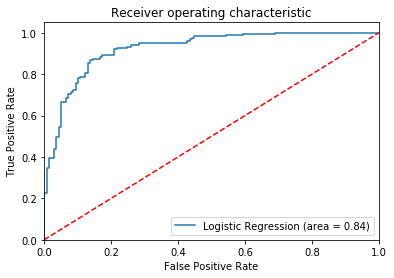

In [50]:
logit_roc_auc = roc_auc_score(y, result2.predict(X))
fpr, tpr, thresholds = roc_curve(y, result2.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()